# Régression multiple

La régression multiple est comme la régression linéaire , mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

Jetez un œil à l’ensemble de données ci-dessous, il contient des informations sur les voitures.

<li>À partir du module <b>sklearn</b>, nous utiliserons la <b>LinearRegression()</b> méthode pour créer un objet de régression linéaire.</li>

<li>Cet objet a une méthode appelée <b>fit()</b> qui prend les valeurs indépendantes et dépendantes comme paramètres et remplit l'objet de régression avec des données décrivant la relation :</li>

In [1]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [28]:
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
X = df['Weight'].values.reshape(-1, 1)  # Convertit la série en tableau 2D (une colonne)
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Prédiction pour un poids de 2300kg
predictedCO2 = regr.predict([[2300]])
print(predictedCO2)


[119.15878811]


# Coefficient

Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si xest une variable, alors 2xest xdeux fois. xest la variable inconnue et le nombre 2est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [4]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.00755095 0.00780526]


<h3>Résultat expliqué</h3>
Le tableau de résultats représente les valeurs des coefficients de poids et de volume.

Poids : 0,00755095
Volume : 0,00780526

Ces valeurs nous indiquent que si le poids augmente de 1 kg, l'émission de CO2 augmente de 0,00755095 g.

Et si la cylindrée (Volume) du moteur augmente de 1 cm 3 , l'émission de CO2 augmente de 0,00780526 g.

Je pense que c'est une estimation juste, mais testons-la !

Nous avons déjà prédit que si une voiture équipée d'un moteur de 1 300 cm 3 pèse 2 300 kg, l'émission de CO2 sera d'environ 107 g.

Et si on augmentait le poids de 1000kg ?

In [9]:
#Exemple
##Copiez l'exemple précédent, mais changez le poids de 2300 à 3300 :

import pandas
from sklearn import linear_model

df = pandas.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Nous avons prédit qu’une voiture équipée d’un moteur de 1,3 litre et pesant 3 300 kg rejetterait environ 115 grammes de CO2 pour chaque kilomètre parcouru.

Ce qui montre que le coefficient de 0,00755095 est correct :

107,2087328 + (1000 * 0,00755095) = 114,75968

In [19]:
"""import matplotlib.pyplot as plt

# Tracer le nuage de points des valeurs réelles par rapport aux valeurs prédites
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], y, color='blue', alpha=0.5)
plt."""

"import matplotlib.pyplot as plt\n\n# Tracer le nuage de points des valeurs réelles par rapport aux valeurs prédites\nplt.figure(figsize=(8, 6))\nplt.scatter(X.iloc[:, 0], y, color='blue', alpha=0.5)\nplt."

# Visualisation du modèle de régression linéaire avec un diagramme

<li>Pour visualiser le modèle de régression linéaire que vous avez entraîné et observer la relation entre les variables prédictives et la variable cible, vous pouvez créer un diagramme de dispersion avec la ligne de régression superposée. Voici le code Python pour le faire :</li>

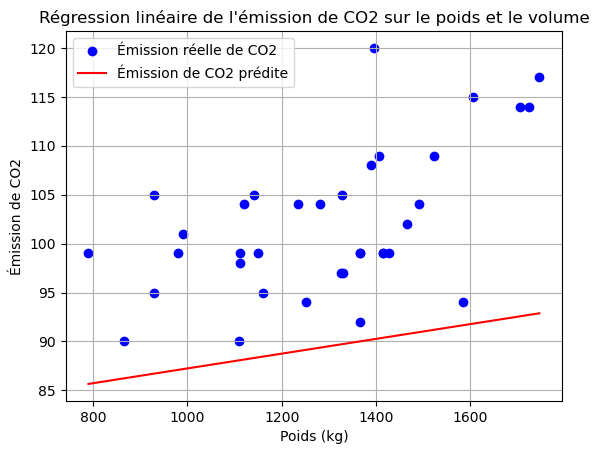

In [36]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# Lire les données du fichier CSV
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\data.csv")

# Sélectionner les caractéristiques et la variable cible
X = df[['Weight', 'Volume']]
y = df['CO2']

# Entraîner le modèle de régression linéaire
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Obtenir les coefficients (pente et ordonnée à l'origine)
pente = regr.coef_[0]  # Coefficient pour la colonne 'Weight' (en supposant la première position)
ordonnee_origine = regr.intercept_

# Générer des points de données pour la ligne de régression
# Supposons que vous voulez tracer la ligne dans la plage de vos données existantes
poids_min = X['Weight'].min()
poids_max = X['Weight'].max()
plage_poids = np.linspace(poids_min, poids_max, 100)  # 100 points

# Calculer les valeurs prédites de CO2 pour la plage de poids
co2_predits = pente * plage_poids + ordonnee_origine

# Créer le diagramme
plt.scatter(X['Weight'], y, color='blue', label='Émission réelle de CO2')
plt.plot(plage_poids, co2_predits, color='red', label='Émission de CO2 prédite')

# Ajouter des étiquettes et un titre
plt.xlabel('Poids (kg)')
plt.ylabel('Émission de CO2')
plt.title('Régression linéaire de l\'émission de CO2 sur le poids et le volume')

# Ajouter une légende
plt.legend()

# Afficher le diagramme
plt.grid(True)
plt.show()
